## Pre-processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
mdata = pd.read_csv('data/musk_csv.csv')      
mdata=mdata.reset_index().values
np.random.shuffle(mdata)          # Shuffling the data
print(mdata)

[[6124 6125 'NON-MUSK-j147' ... -158 -22 0]
 [3760 3761 'NON-MUSK-289' ... -158 127 0]
 [579 580 'MUSK-256' ... -162 130 1]
 ...
 [1944 1945 'NON-MUSK-233' ... -142 -3 0]
 [218 219 'MUSK-215' ... -120 45 1]
 [5177 5178 'NON-MUSK-j146' ... -162 132 0]]


In [4]:
train_length=len(mdata)   # Taking full data, splittng the train and validation inside keras.fit
print("Data rows: {}".format(train_length))
train_data = mdata[:,4:]
print("Train data:")
print(train_data)

Data rows: 6598
Train data:
[[44 89 30 ... -158 -22 0]
 [35 -136 -150 ... -158 127 0]
 [36 -121 -130 ... -162 130 1]
 ...
 [44 -103 -18 ... -142 -3 0]
 [48 -192 -145 ... -120 45 1]
 [36 -128 -126 ... -162 132 0]]


In [5]:
class_traindata=train_data[:,-1]
musk_traindata=sum(class_traindata)
nonmusk_traindata=train_length-musk_traindata
print('Musk record in train data: {}'.format(musk_traindata))
print('Non-Musk record in train data: {}'.format(nonmusk_traindata))

Musk record in train data: 1017
Non-Musk record in train data: 5581


## Model

In [6]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()
model.add(Dense(60, input_dim=166, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [7]:
def data_splitter(data):
    y_train=[]
    x_train=data[:,:-1]
    x_train=x_train.astype(float)
    for row in train_data:
        if (row[-1]==0):
            y_train0=[0.0,1.0]
        else:
            y_train0=[1.0,0.0]
        y_train.append(y_train0)
    y_train=np.array(y_train)
    return x_train,y_train
X,Y=data_splitter(train_data)
X_train=X
y_train=Y

history = model.fit(X_train,y_train, epochs=150,validation_split=0.2,batch_size=500)
model.save_weights('weights.h5')

Epoch 1/150
11/11 [==============================] - 2s 140ms/step - loss: 0.4742 - accuracy: 0.7709 - f1_m: 0.7745 - precision_m: 0.7745 - recall_m: 0.7745 - val_loss: 0.8962 - val_accuracy: 0.8417 - val_f1_m: 0.8415 - val_precision_m: 0.8415 - val_recall_m: 0.8415
Epoch 2/150
11/11 [==============================] - 0s 29ms/step - loss: 0.2816 - accuracy: 0.8956 - f1_m: 0.8955 - precision_m: 0.8955 - recall_m: 0.8955 - val_loss: 0.7064 - val_accuracy: 0.8394 - val_f1_m: 0.8395 - val_precision_m: 0.8395 - val_recall_m: 0.8395
Epoch 3/150
11/11 [==============================] - 0s 21ms/step - loss: 0.2205 - accuracy: 0.9225 - f1_m: 0.9223 - precision_m: 0.9223 - recall_m: 0.9223 - val_loss: 0.5214 - val_accuracy: 0.8455 - val_f1_m: 0.8452 - val_precision_m: 0.8452 - val_recall_m: 0.8452
Epoch 4/150
11/11 [==============================] - 0s 34ms/step - loss: 0.1800 - accuracy: 0.9344 - f1_m: 0.9355 - precision_m: 0.9355 - recall_m: 0.9355 - val_loss: 0.4747 - val_accuracy: 0.8576 - v

Epoch 32/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0173 - accuracy: 0.9962 - f1_m: 0.9962 - precision_m: 0.9962 - recall_m: 0.9962 - val_loss: 0.0377 - val_accuracy: 0.9864 - val_f1_m: 0.9865 - val_precision_m: 0.9865 - val_recall_m: 0.9865
Epoch 33/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0143 - accuracy: 0.9964 - f1_m: 0.9965 - precision_m: 0.9965 - recall_m: 0.9965 - val_loss: 0.0315 - val_accuracy: 0.9879 - val_f1_m: 0.9882 - val_precision_m: 0.9882 - val_recall_m: 0.9882
Epoch 34/150
11/11 [==============================] - 0s 23ms/step - loss: 0.0129 - accuracy: 0.9968 - f1_m: 0.9968 - precision_m: 0.9968 - recall_m: 0.9968 - val_loss: 0.0277 - val_accuracy: 0.9924 - val_f1_m: 0.9926 - val_precision_m: 0.9926 - val_recall_m: 0.9926
Epoch 35/150
11/11 [==============================] - 0s 28ms/step - loss: 0.0129 - accuracy: 0.9972 - f1_m: 0.9970 - precision_m: 0.9970 - recall_m: 0.9970 - val_loss: 0.0276 - val_accuracy: 0.9909 

Epoch 63/150
11/11 [==============================] - 0s 18ms/step - loss: 0.0037 - accuracy: 0.9992 - f1_m: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - val_loss: 0.0129 - val_accuracy: 0.9955 - val_f1_m: 0.9952 - val_precision_m: 0.9952 - val_recall_m: 0.9952
Epoch 64/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9992 - f1_m: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - val_loss: 0.0120 - val_accuracy: 0.9970 - val_f1_m: 0.9970 - val_precision_m: 0.9970 - val_recall_m: 0.9970
Epoch 65/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0048 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0105 - val_accuracy: 0.9962 - val_f1_m: 0.9963 - val_precision_m: 0.9963 - val_recall_m: 0.9963
Epoch 66/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 0.9994 - f1_m: 0.9993 - precision_m: 0.9993 - recall_m: 0.9993 - val_loss: 0.0119 - val_accuracy: 0.9962 

11/11 [==============================] - 0s 30ms/step - loss: 0.0016 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9977 - val_f1_m: 0.9972 - val_precision_m: 0.9973 - val_recall_m: 0.9973
Epoch 94/150
11/11 [==============================] - 0s 25ms/step - loss: 0.0020 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0086 - val_accuracy: 0.9985 - val_f1_m: 0.9979 - val_precision_m: 0.9979 - val_recall_m: 0.9979
Epoch 95/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0138 - val_accuracy: 0.9962 - val_f1_m: 0.9959 - val_precision_m: 0.9959 - val_recall_m: 0.9959
Epoch 96/150
11/11 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 0.9992 - f1_m: 0.9991 - precision_m: 0.9991 - recall_m: 0.9991 - val_loss: 0.0109 - val_accuracy: 0.9977 - val_f1_m: 0

Epoch 124/150
11/11 [==============================] - 0s 31ms/step - loss: 0.0033 - accuracy: 0.9991 - f1_m: 0.9991 - precision_m: 0.9991 - recall_m: 0.9991 - val_loss: 0.0149 - val_accuracy: 0.9939 - val_f1_m: 0.9939 - val_precision_m: 0.9939 - val_recall_m: 0.9939
Epoch 125/150
11/11 [==============================] - 0s 31ms/step - loss: 0.0031 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0105 - val_accuracy: 0.9962 - val_f1_m: 0.9955 - val_precision_m: 0.9955 - val_recall_m: 0.9955
Epoch 126/150
11/11 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.9998 - f1_m: 0.9998 - precision_m: 0.9998 - recall_m: 0.9998 - val_loss: 0.0096 - val_accuracy: 0.9977 - val_f1_m: 0.9972 - val_precision_m: 0.9973 - val_recall_m: 0.9973
Epoch 127/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0077 - val_accuracy: 0.9

## Results

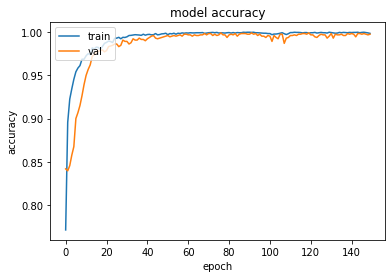

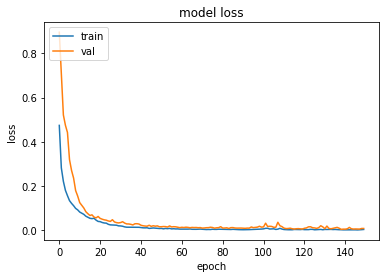

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
print('Validation accuracy   :   {}'.format(history.history['val_accuracy'][-1]))
print('Validation loss       :   {}'.format(history.history['val_loss'][-1]))
print('Validation precision  :   {}'.format(history.history['val_precision_m'][-1]))
print('Validation recall     :   {}'.format(history.history['val_recall_m'][-1]))
print('Validation f1 score   :   {}'.format(history.history['val_f1_m'][-1]))

Validation accuracy   :   0.9977272748947144
Validation loss       :   0.007147185038775206
Validation precision  :   0.9976250529289246
Validation recall     :   0.9976250529289246
Validation f1 score   :   0.997624933719635
